<a href="https://colab.research.google.com/github/cubansalsa/nlp/blob/main/NLP_Data_Preprocessing_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Read using pandas Reviesws.csv file
df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
# Fill missing values in 'overview' with an empty string
df['text'] = df['Text'].fillna('')

# Display the first 5 rows of the 'overview' column
df['text'].head()

,text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [3]:
# Import necessary libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Define a text preprocessing function
def preprocess_text(text):
    # Convert to string if it's not already
    if not isinstance(text, str):
        text = str(text)

    # 1. Lowercase the text
    text = text.lower()

    # 2. Tokenize the text
    tokens = word_tokenize(text)

    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # 4. Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Ensure all values in 'text' are strings
df['tokenized_text'] = df['text'].astype(str)

# Apply the text preprocessing function directly to the 'text' column
df['tokenized_text'] = df['tokenized_text'].apply(preprocess_text)

# Display the first 5 rows of the 'text' column after preprocessing
df['tokenized_text'].head()

,tokenized_text
0,"[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, jumbo, salted, pea..."
2,"[confection, around, century, light, pillowy, ..."
3,"[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, great, price, wide, assortment,..."


In [5]:
#Create Word Embeddings:
#Use Word2Vec to create word embeddings for your preprocessed text.
#Generate embeddings for each item in your dataset by averaging the word vectors.
#Check for any invalid embeddings and filter them out if necessary.

# Create a Word2Vec model
model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Display the vocabulary size
print(f"Vocabulary size: {len(model.wv.index_to_key)}")

Vocabulary size: 48306


In [6]:
# Create a Word2Vec model using the tokenized 'text' column

# Extract 10 words from the model's vocabulary
words = model.wv.index_to_key[:100]

# Create a DataFrame to display words and their embeddings
word_embeddings = [model.wv[word] for word in words]
embeddings_df = pd.DataFrame(word_embeddings, index=words)

# Display the DataFrame with 10 words and their corresponding embeddings
print(embeddings_df)

               0         1         2         3         4         5         6   \
br      -1.379064  0.597775 -0.056321  0.944429 -0.787205  0.161040  0.572609   
like    -0.454956  1.191538  0.566119  0.031456  1.550717 -0.736683 -0.191761   
taste   -0.974558  0.538328 -1.547686 -0.793358  1.519974  1.600228  0.633937   
good     0.451879  0.449723  1.406031 -0.234270  1.134793  0.370028 -0.534425   
one     -0.710783  1.334531 -1.098118 -0.249422 -1.882252 -0.056040 -0.834543   
...           ...       ...       ...       ...       ...       ...       ...   
small   -1.052250  2.209858  1.786927  1.390109  0.549594  1.342166 -2.257907   
free    -1.337675  0.142773 -1.239658  0.182262 -0.754547 -2.025926  0.561846   
organic  1.013052 -1.256930 -0.008098  1.555454 -0.261079  0.515461 -0.582063   
healthy -0.065317 -1.387292  0.607890  2.935753  0.199303 -1.941630 -1.127058   
enough  -0.548757  0.435241  1.238530 -0.131816  0.068669  0.280601 -0.769029   

               7         8 

In [7]:
# Function to generate an embedding for each movie overview
def get_movie_embedding(tokenized_text, model, embedding_size=100):
    # Get word embeddings for each word in the tokenized text
    valid_embeddings = [model.wv[word] for word in tokenized_text if word in model.wv]

    # If no valid embeddings, return a zero vector of the same size as the word vectors
    if len(valid_embeddings) == 0:
        return np.zeros(embedding_size)

    # Otherwise, return the mean of the valid embeddings
    return np.mean(valid_embeddings, axis=0)

# Apply the function to generate embeddings for each movie
# Make sure to define the embedding size to match the model's vector size
embedding_size = model.vector_size
df['text_embedding'] = df['tokenized_text'].apply(lambda x: get_movie_embedding(x, model, embedding_size=embedding_size))

In [8]:
# Check for invalid embeddings (e.g., NaNs or wrong shapes)
invalid_embeddings = df['text_embedding'].apply(lambda x: x.shape[0] != embedding_size or np.any(np.isnan(x)))

# Print the number of invalid embeddings
print(f"Number of invalid embeddings: {invalid_embeddings.sum()}")

# Filter out invalid embeddings, if any
df = df[~invalid_embeddings]


Number of invalid embeddings: 0


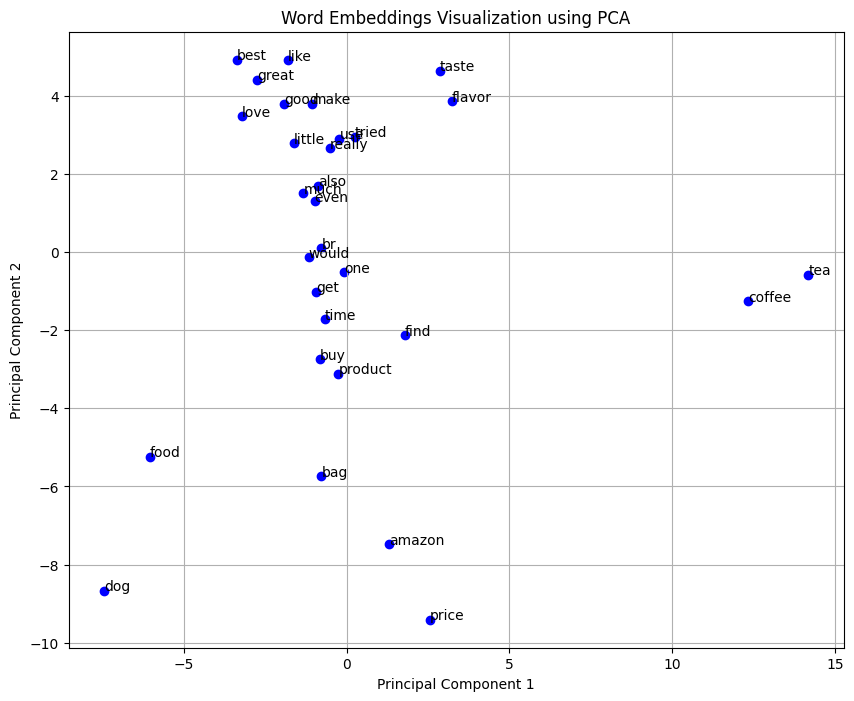

In [9]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select 30 random words from the vocabulary
words = list(model.wv.index_to_key)[:30]

# Get the word embeddings for these words
word_vectors = [model.wv[word] for word in words]

# Use PCA to reduce the word vectors to 2 dimensions
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], c='blue')

# Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

# Display the plot
plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [ ]:
#Calculate Similarity:
#Choose a similarity metric such as Cosine Similarity, Jaccard Similarity, or Euclidean Similarity.
#Calculate the similarity between items based on their embeddings and create a similarity matrix.

# Calculate cosine similarity between movie embeddings
embeddings_matrix = np.vstack(df['text_embedding'].values)
cosine_sim = cosine_similarity(embeddings_matrix)

# Display the shape of the similarity matrix
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")